In [1]:
import pywindow as pw

In [2]:
traj = pw.trajectory.DLPOLY("./data/input/HISTORY_singlemol")

In [3]:
traj.no_of_frames

715

In [4]:
frame_0 = traj.get_frames(0)

In [5]:
frame_0.system

{'atom_ids': array(['ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc',
        'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha',
        'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct',
        'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca',
        'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc',
        'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc',
        'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct',
        'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd',
        'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni',
        'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc',
        'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he',
        'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct',
        'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca',
        'cd', 'ct', 'ct', 

In [6]:
frame_0.decipher_atom_keys("opls")

_AtomKeyConflict: One of the OPLS conflicting atom_keys has occured 'he'. For how to solve this issue see the manual or MolecularSystem._atom_key_swap() doc string.

In [ ]:
frame_0.swap_atom_keys({"he": "H"})

In [ ]:
frame_0.decipher_atom_keys("opls")

In [7]:
frame_0.system

{'atom_ids': array(['ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc',
        'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha',
        'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct',
        'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca',
        'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc',
        'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc',
        'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct',
        'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd',
        'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni',
        'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he', 'hc', 'hc', 'hc',
        'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct', 'ct', 'ha', 'he',
        'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca', 'cd', 'ct', 'ct',
        'ct', 'ha', 'he', 'hc', 'hc', 'hc', 'hc', 'hc', 'ni', 'ca', 'ca',
        'cd', 'ct', 'ct', 

In [14]:
traj.analysis(forcefield="opls", swap_atoms={"he": "H"}, ncpus=8)

In [15]:
traj.save_analysis("./data/output/HISTORY_out.json")

In [16]:
import json

import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [17]:
with open("./data/output/HISTORY_out.json") as file:
    saved_analysis = json.load(file)

In [24]:
windows = []
pore_diam_opt = []
max_diam = []

for key in saved_analysis:
    if int(key) >= 200:
        for i in saved_analysis[key]["0"]["windows"]["diameters"]:
            windows.append(i)
        pore_diam_opt.append(
            saved_analysis[key]["0"]["pore_diameter_opt"]["diameter"]
        )
        max_diam.append(
            saved_analysis[key]["0"]["maximum_diameter"]["diameter"]
        )

In [25]:
x_range_windows = np.linspace(min(windows) - 1, max(windows) + 1, 1000)

kde_windows = stats.gaussian_kde(windows)
dist_windows = kde_windows(x_range_windows)

x_range_pore = np.linspace(
    min(pore_diam_opt) - 1, max(pore_diam_opt) + 1, 1000
)

kde_pore = stats.gaussian_kde(pore_diam_opt)
dist_pore = kde_pore(x_range_pore)

x_range_max = np.linspace(min(max_diam) - 1, max(max_diam) + 1, 1000)

kde_max = stats.gaussian_kde(max_diam)
dist_max = kde_max(x_range_max)

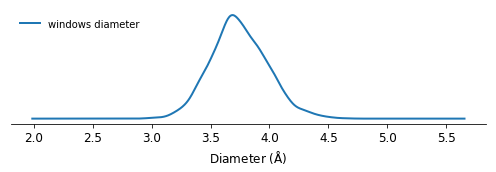

In [26]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(x_range_windows, dist_windows, label="windows diameter", linewidth=2)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.set_facecolor("white")
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_windows.pdf", dpi=300)
plt.show()

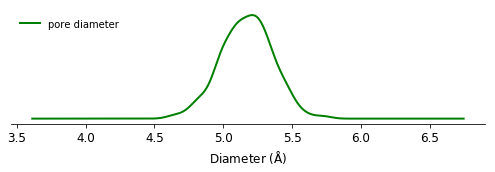

In [27]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(
    x_range_pore, dist_pore, label="pore diameter", linewidth=2, color="green"
)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_pores.pdf", dpi=300)
plt.show()

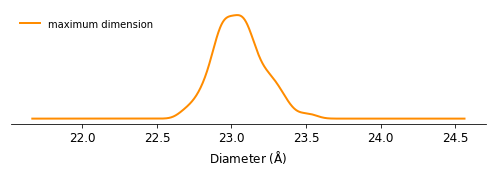

In [30]:
fig, ax = plt.subplots(figsize=(7, 2.5))

plt.plot(
    x_range_max,
    dist_max,
    label="maximum dimension",
    linewidth=2,
    color="darkorange",
)

ax.axes.get_yaxis().set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(True)
ax.spines["bottom"].set_color("k")
ax.spines["left"].set_visible(False)
ax.grid(b=False)
ax.set_facecolor("white")
ax.tick_params(axis="both", which="major", labelsize=12, top="off")
[t.set_color("k") for t in ax.xaxis.get_ticklabels()]
[
    text.set_color("k")
    for text in ax.legend(frameon=False, fontsize=10, loc=2).get_texts()
]
ax.set_xlabel(r"Diameter ($\mathregular{\AA)}$", fontsize=12)

plt.tight_layout()
# plt.savefig("trajectory_maxdim.pdf", dpi=300)
plt.show()